In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import unitary_group
import qutip as qt
import numpy.linalg as LA

Date: 25.10.2022

### Optimization of the sampling process

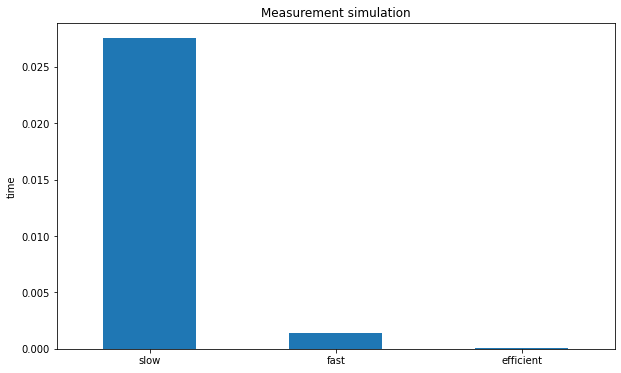

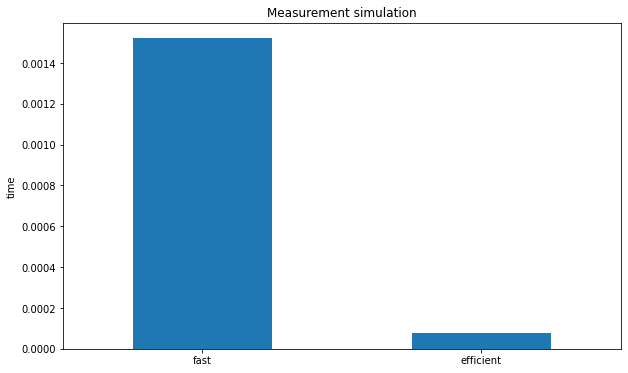

In [6]:
import pure
import simulate
import visualization
import const

N     = int(1e03)
rho_0 = pure.unitary_to_density(2, 1)

slow = (simulate.measure_slow, [rho_0, N])
fast = (simulate.measure, [rho_0, N])
eff  = (simulate.measure_efficiently, [rho_0, N, const.pauli4])

visualization.speed_comparison('Measurement simulation', iterations=5, slow=slow, fast=fast, efficient=eff)
visualization.speed_comparison('Measurement simulation', iterations=5, fast=fast, efficient=eff)

- Adrian’s version is way faster and way more efficient than both of my methods
- np.apply_along_axis is really slow
- 'fast' measure version requires to much aquiring arrays

### Compare np.unique-based count version with an alternative

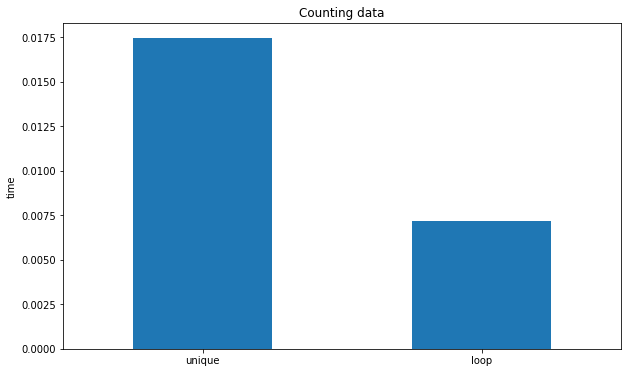

In [3]:
import simulate
import inversion
import const
import pure
import visualization

N     = int(1e06)
rho_0 = pure.unitary_to_density(2, 1)
M     = const.pauli6
D     = simulate.measure(rho_0, N, M)

unique = (inversion.count_unique, [D, np.zeros(len(M), dtype=np.int64)])
loop   = (inversion.count, [D, np.zeros(len(M), dtype=np.int64)])

visualization.speed_comparison('Counting data', iterations=5, unique=unique, loop=loop)

### Verify correcctness of MLE

In [ ]:
# eigenstates
rho_0 = 1/2*np.array([[1, 1], [1, 1]])
rho_0 = 1/2*np.array([[1, -1j], [1j, 1]])
rho_0 = np.array([[1, 0], [0, 0]])
rho_0 = np.array([-0.32505758+0.32505758j, 0.88807383+0.j])[:, None]@np.array([-0.32505758-0.32505758j, 0.88807383+0.j])[None, :]

# non eigenstates
rho_0 = 1/2*np.array([[1, -1], [-1, 1]])
rho_0 = 1/2*np.array([[1, 1j], [-1j, 1]])
rho_0 = np.array([[0, 0], [0, 1]])

#### Pure state

rho4
0.00025061982681062744
The follwing 1 states are not pure:
 [[[ 0.99224143-1.50157544e-17j -0.064511  -5.52438164e-02j]
  [-0.064511  +5.52438164e-02j  0.00775857+1.50157544e-17j]]]
Purity:
 [0.99903035-3.04328675e-17j]
False
rho6
2.4034736122890976e-05
The follwing 1 states are not pure:
 [[[ 0.99268762-5.87370408e-20j -0.06253467-5.78647387e-02j]
  [-0.06253467+5.78647387e-02j  0.00731238+5.87370408e-20j]]]
Purity:
 [1.+6.82313785e-18j]
False


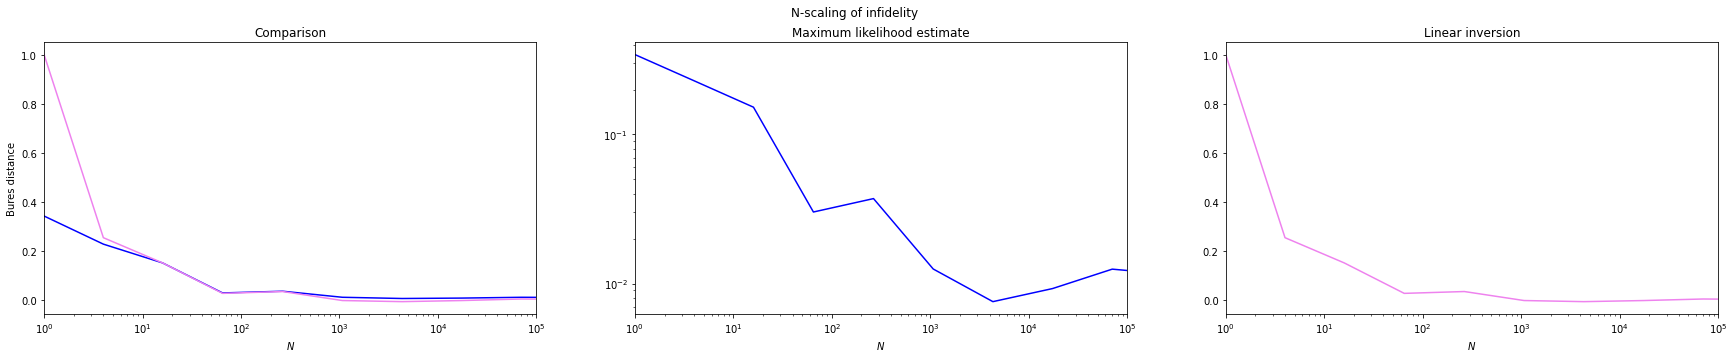

In [10]:
import mle
import simulate
import const
import general
import check
import visualization
import pure
import mixed

N     = np.int64(1e05)

# state
rho_0 = pure.unitary_to_density(2, 1)

# POVMs
M = const.pauli4

# data
D4 = simulate.measure(rho_0, N, const.pauli4)
D6 = simulate.measure(rho_0, N, const.pauli6)

# evaluate
rho4 = mle.iterative(D4, const.pauli4)
rho6 = mle.iterative(D6, const.pauli6)

print('rho4')
print(1-general.fidelity(rho_0, rho4))
print(check.purity(rho4))
print('rho6')
print(1-general.fidelity(rho_0, rho6))
print(check.purity(rho6))

visualization.infidelity(rho_0, M, N)

#### Mixed state

rho4
1.2329368878516433e-05
The follwing 1 states are not pure:
 [[[ 0.70116-2.48768313e-18j -0.15851-4.60000000e-02j]
  [-0.15851+4.60000000e-02j  0.29884+2.48768313e-18j]]]
Purity:
 [0.63541353-2.00168936e-18j]
False
rho6
6.763959721989288e-06
The follwing 1 states are not pure:
 [[[ 0.70317756+3.89349014e-21j -0.16049714-4.08723456e-02j]
  [-0.16049714+4.08723456e-02j  0.29682244-3.89349014e-21j]]]
Purity:
 [0.637422+8.67678166e-18j]
False


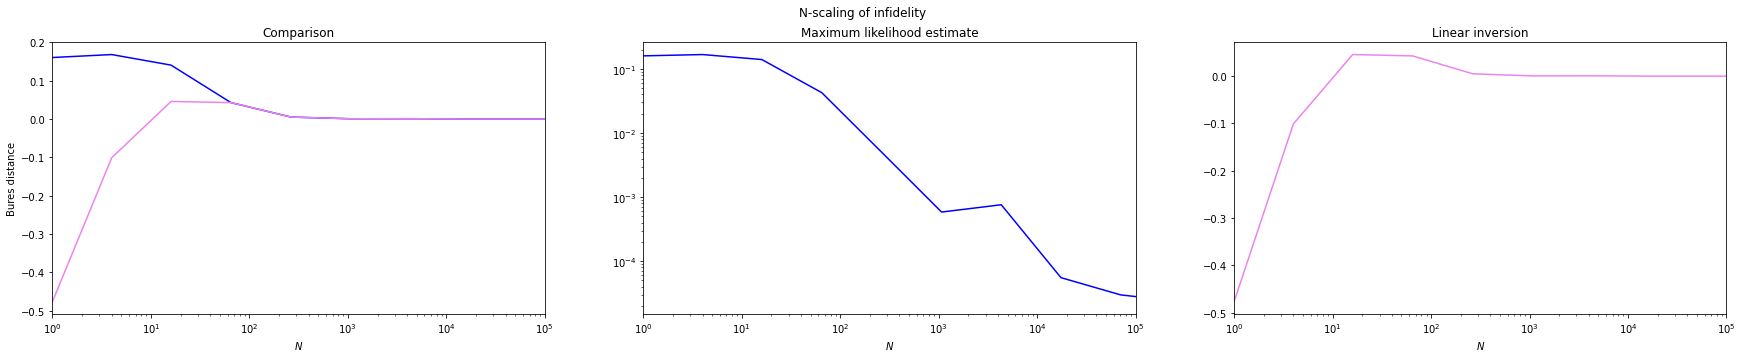

In [11]:
import mle
import simulate
import const
import general
import check
import visualization
import pure
import mixed

N     = np.int64(1e05)

# state
rho_0 = mixed.hermitian_to_density(2, 1)[0]

# POVMs
M = const.pauli4

# data
D4 = simulate.measure(rho_0, N, const.pauli4)
D6 = simulate.measure(rho_0, N, const.pauli6)

# evaluate
rho4 = mle.iterative(D4, const.pauli4)
rho6 = mle.iterative(D6, const.pauli6)

print('rho4')
print(1-general.fidelity(rho_0, rho4))
print(check.purity(rho4))
print('rho6')
print(1-general.fidelity(rho_0, rho6))
print(check.purity(rho6))

visualization.infidelity(rho_0, M, N)

#### Eigenstate

rho4
0.002040825427354842
The follwing 1 states are not pure:
 [[[0.4940933 -4.32390704e-17j 0.49592251-8.38012115e-04j]
  [0.49592251+8.38012115e-04j 0.5059067 +4.32390704e-17j]]]
Purity:
 [0.99194946+6.06527206e-17j]
False
rho6
3.217140315259215e-06
True


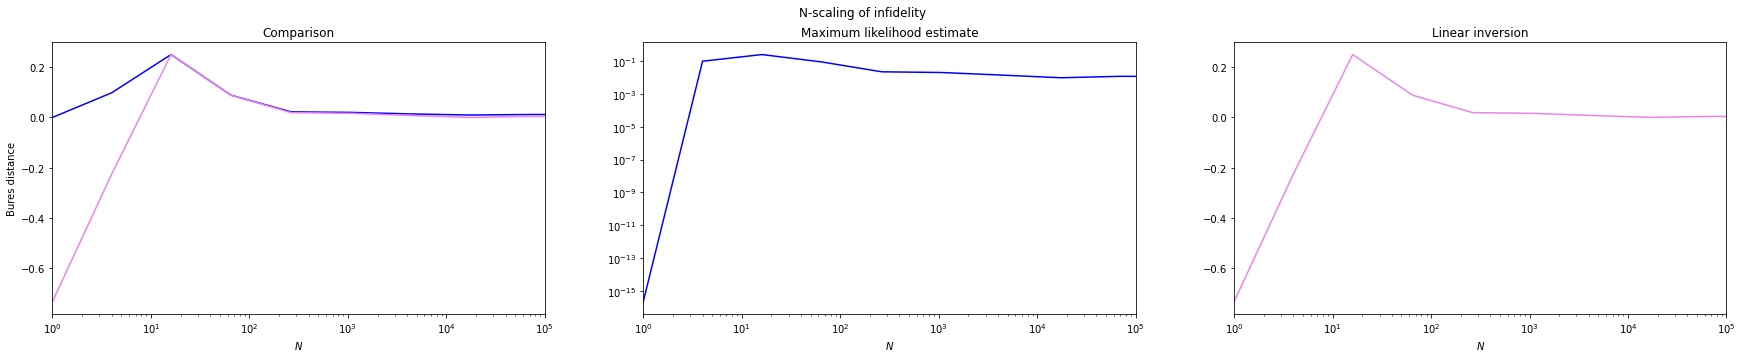

In [12]:
import mle
import simulate
import const
import general
import check
import visualization
import pure
import mixed

N     = np.int64(1e05)

# state
rho_0 = 1/2*np.array([[1, 1], [1, 1]])

# POVMs
M = const.pauli4

# data
D4 = simulate.measure(rho_0, N, const.pauli4)
D6 = simulate.measure(rho_0, N, const.pauli6)

# evaluate
rho4 = mle.iterative(D4, const.pauli4)
rho6 = mle.iterative(D6, const.pauli6)

print('rho4')
print(1-general.fidelity(rho_0, rho4))
print(check.purity(rho4))
print('rho6')
print(1-general.fidelity(rho_0, rho6))
print(check.purity(rho6))

visualization.infidelity(rho_0, M, N)

#### Non-eigenstate 

rho4
[[ 0.49929964+3.47152574e-20j -0.00200772+4.99995479e-01j]
 [-0.00200772-4.99995479e-01j  0.50070036-3.47152574e-20j]]
2.2607242265992866e-06
True
rho6
[[0.50193214-6.79768316e-20j 0.00380574+4.99981783e-01j]
 [0.00380574-4.99981783e-01j 0.49806786+6.79768316e-20j]]
9.108621836895203e-06
True
compare
2.0358193479119713e-05


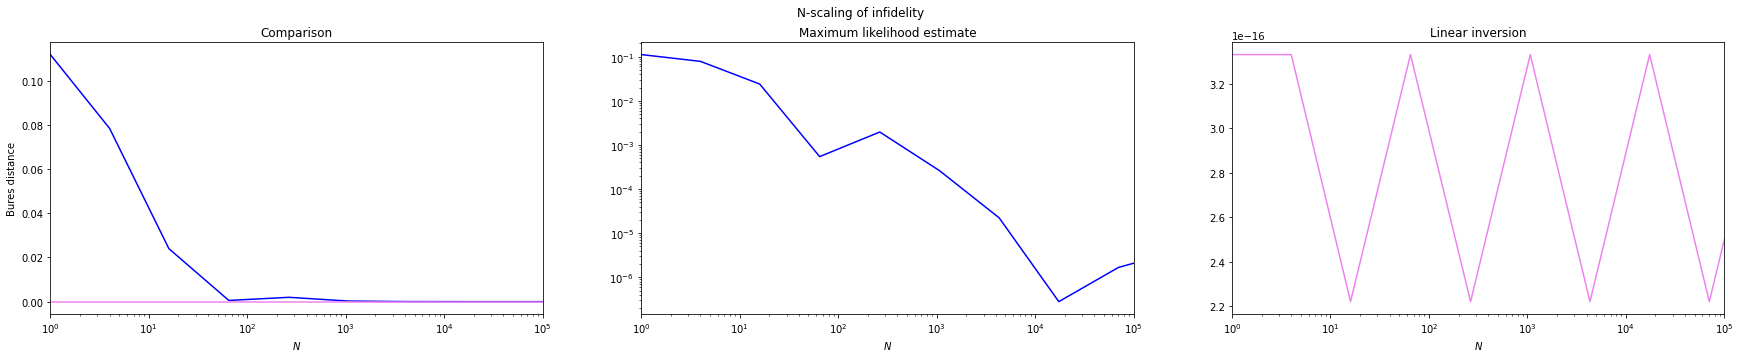

In [13]:
import mle
import simulate
import const
import general
import check
import visualization
import pure
import mixed

N     = np.int64(1e05)

# state
rho_0 = 1/2*np.array([[1, 1j], [-1j, 1]])

# POVMs
M = const.pauli4

# data
D4 = simulate.measure(rho_0, N, const.pauli4)
D6 = simulate.measure(rho_0, N, const.pauli6)

# evaluate
rho4 = mle.iterative(D4, const.pauli4)
rho6 = mle.iterative(D6, const.pauli6)

print('rho4')
print(rho4)
print(1-general.fidelity(rho_0, rho4))
print(check.purity(rho4))
print('rho6')
print(rho6)
print(1-general.fidelity(rho_0, rho6))
print(check.purity(rho6))
print('compare')
print(1-general.fidelity(rho4, rho6))

visualization.infidelity(rho_0, M, N)